# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.
#import modules
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

#look at df
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the data normally distributed?

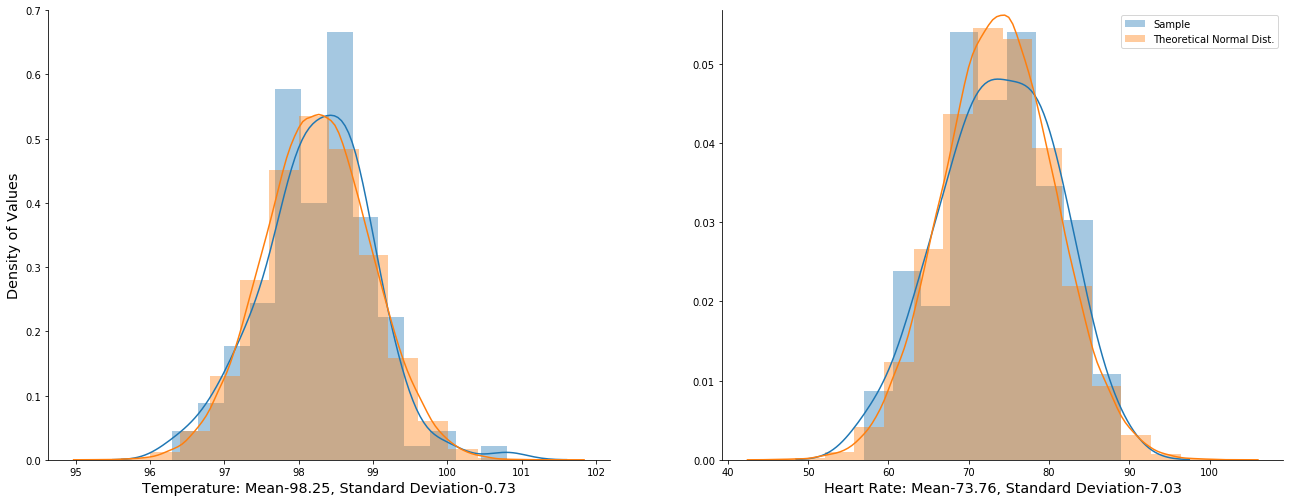

In [4]:
#Create a histogram of the data for visual inspection

#Set varibles from dataframe
T = df['temperature']
G = df['gender']
H = df['heart_rate']

#Establish Paper Sizes
A5 = (5.85,4.135)
A4 = (11.7,8.27)
A3 = (22.14,16.54)

#Create Subplots
f, ax = plt.subplots(1, 2)
f.set_size_inches(A3[0],A4[1])
ax[0].set_xlabel('Temperature', fontsize='x-large')
ax[0].set_ylabel('Density of Values', fontsize='x-large')
ax[1].set_xlabel('Heart Rate', fontsize='x-large')



#Find distrobution parameters
muT = round(np.mean(T), 2)
sigT = round(np.std(T), 2)
vT = round(np.var(T), 2)

muH = round(np.mean(H), 2)
sigH = round(np.std(H), 2)
vH = round(np.var(H), 2)

#create labels
Tstring = 'Temperature: Mean-' + str(muT) + ', Standard Deviation-' + str(sigT)
Hstring = 'Heart Rate: Mean-' + str(muH) + ', Standard Deviation-' + str(sigH)

#Plot Histograms
f = sns.distplot(T, ax=ax[0], axlabel=Tstring, label='Sample')
f = sns.distplot(H, ax=ax[1], axlabel=Hstring, label='Sample')

#Create theoretical normal distrobutions
theo_T = np.random.normal(muT, sigT, 100000)
theo_H = np.random.normal(muH, sigH, 100000)

#Overlay theoretical normal distrobutions
f = sns.distplot(theo_T, ax=ax[0], hist=True, bins=16, label='Theoretical Normal Dist.')
f = sns.distplot(theo_H, ax=ax[1], hist=True, bins=16, label='Theoretical Normal Dist.')

sns.despine(ax=ax[0])
sns.despine(ax=ax[1])

plt.legend()
plt.show()

A visual inspection through histograms shows that the dataset appears to roughly fit a normal distribution. however, there appears to be a double peak in in each of the variables. Perhaps this corresponds to differing means between male and female populations.

In [5]:
#Shapiro-Wilk Test for Normality
wT, pT = stats.shapiro(T)
wH, pH = stats.shapiro(H)


print('Shapiro-Wilk Test Results:') 
print('Temperature: Test Statistic -',round(wT,5),' p-value-',round(pT,2))
print('Heart Rate: Test Statistic -',round(wH,5),' p-value-',round(pH,2))

Shapiro-Wilk Test Results:
Temperature: Test Statistic - 0.98658  p-value- 0.23
Heart Rate: Test Statistic - 0.98854  p-value- 0.36


The [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) is a test of normality, found to have the best power for a given significance via [Monte Carlo simulation](https://en.wikipedia.org/wiki/Monte_Carlo_method). The null hypothesis for this test is that the dataset is normally distributed. Thus, if the p-value is below the chosen alpha level, then the hypothesis that the data is normally distributed is rejected. But, if it is above the alpha level, then it is not rejected.

The p-values of Temperature (0.23) and Heart rate (0.36) both exceed a typical alpha level of 0.05 by a significant margin, and thus cannot be ruled out as normal distributions. One would expect a randomly sampled normal distribution to result in a lower test statistic value roughly 23% and 36% of the time respectively. Higher p-values would increase confidence the data is normally distributed.

### 2. Is the sample size large? Are the observations independent

In [6]:
#Determine Sample Size
print('Sample Size:',len(T))

Sample Size: 130


The Sample size is 130 individuals. Observations can be considered independent as they are obviously less than 10% of the population at large. A sample size of 130 is well over the the threshold of 30 needed for the Central Limit Theorem to apply.

In [7]:
#disagrigate by gender
male = df.loc[G == 'M']
female = df.loc[G == 'F']

print('No. Male:', len(male),'No. Female:',len(female))

No. Male: 65 No. Female: 65


The male female ratio is 1:1, with 65 observations each. If these samples were to be compared with each other Cohen's d table indicates a mean difference of 0.5 standard deviations would have a statistical power slightly under .80

### 3. Is the true population mean really 98.6 degrees F?


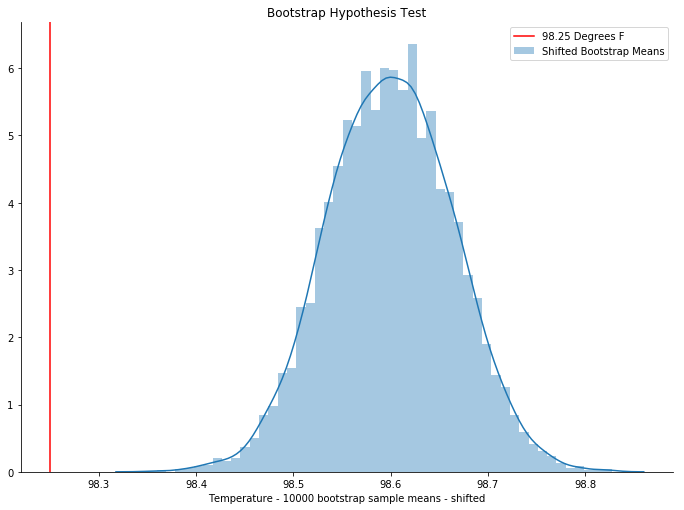

Mean Temperature - unshifted sample: 98.25
Mean Temperature - shifted sample: 98.6
P-value(>=98.25):0.0


In [8]:
#Bootstrap hypothesis test. 
#create bootstrap function
def bs_sample(v, function, size = 10000):
    
    #generate random seed (should produce the same "random" result everytime, and reduce bandwidth)
    np.random.seed(42) 
    
    #initialize replicates
    bs_sample = np.empty(size)
    
    #create replicates
    for i in range(size):
        bs = function(np.random.choice(v, size=len(v)))
        bs_sample[i] = bs

    return  bs_sample

n=10000

#Shift sample over to 98.6
shifted_sample = T + (98.6 - muT)

#Create Bootstrap Means
shifted_bs_means = bs_sample(shifted_sample, np.mean,n)
bs_means = bs_sample(T,np.mean,n)

#Find mean of bootstrap means
bs_mean_mean = np.mean(bs_means)
shifted_mean_mean = np.mean(shifted_bs_means)

#find p value
p = np.sum(shifted_bs_means <= muT)/n


#Plot bootstrap means
f, ax = plt.subplots(1, 1)
#sns.distplot(bs_means, label='Bootstrap Means')
sns.distplot(shifted_bs_means, label = 'Shifted Bootstrap Means')
plt.axvline(x=muT, c='r', label=str(round(muT,2))+' Degrees F')
f.set_size_inches(A4)
sns.despine()
xlabel='Temperature - '+str(n)+' bootstrap sample means - shifted'
ax.set_xlabel(xlabel)
ax.set_title('Bootstrap Hypothesis Test')
plt.legend()

plt.show()
mstring = 'Mean Temperature - unshifted sample: '+str(round(bs_mean_mean,2))\
            +'\nMean Temperature - shifted sample: '+str(round(shifted_mean_mean,2))\
            +'\nP-value(>='+str(muT)+'):'+str(p)


print(mstring)

#### Bootstrap Hypothesis Test
Null Hypothesis: The true mean of the population is 98.6 F ($H_0: \mu = 98.6 ^{\circ}$).

Alternate Hypothesis:  The true mean is not 98.6 F ($H_a: \mu \neq 98.6 ^{\circ}$).

Were the Null Hypothesis true, one would expect a similar sample with a mean of 98.6 to result in the actual sample mean of 98.25 degrees F a statistically significant percentage of the time. The bootstrap hypothesis test shifts all values of the sample over by the difference in it's mean from 98.6 degrees, draws 10,000 random bootstrap samples out of it and computes their means in turn. This simulates a hypothetical sample of the data where the null hypothesis is true, 10,000 times. The P-value is the proportion of these samples resulting in a mean as extreme as 98.25, due to sampling variation. 

In this case the P-value is 0. Meaning absolutely none of the hypothetical samples resulted in a mean as low as 98.25. Thus, the null hypothesis can be rejected. Note that a two tailed test and a 1 tailed test would produce the same P-value of 0.


#### Frequentist statistical testing

A one sample test is appropriate, because there is only one sample provided.  In manual calculations a T statistic is usually better for testing means in the event that the sample for the Null Hypothesis is unavailable, such as this. 

In this case the null hypothesis remains the same as above:

$H_0: \mu = 98.6 ^{\circ}$

$H_a: \mu \neq 98.6 ^{\circ}$

With a sample mean of 98.25, a standard deviation of 0.73, and a sample size of 130, we calculate the test statistic with:

$$T = \frac{9.25-98.6}{\frac{0.73}{\sqrt{130}}}$$

In [9]:
# Manual T statistic
import math
tempT = (muT-98.6)/(sigT/math.sqrt(len(T)))
print('T =',round(tempT,2))

T = -5.47


Looking this up on a T table with $\infty$ degrees of freedom results in a P-value off the chart (less than 0.0005).

We can also use inbuilt python functions to achieve a more precise result:

In [10]:
tempT, tempP = stats.ttest_1samp(T, 98.6)
print('T =',round(tempT,2),'\nTwo tailed P-value =',round(tempP,8))

T = -5.45 
Two tailed P-value = 2.4e-07


... Or a two tailed T test P-value < 0.00000025 

Incidentally, this suggests the bootstrap hypothesis test might result in a non-zero P-value if run for over one million iterations. 

Z statistics are usually more suited for calculating proportions in single sample tests, in which case, Z is the difference of the sample proportion from the null proportion divided by the standard error over the square root of the sample size:

$$Z = \frac{\hat{p}-p_0}{\frac{\sigma}{\sqrt{n}}}$$

However, for a single sample difference of means, they are calculated exactly as with a T statistic, but with a differently interpreted result. This is because the standard error of the mean cannot be calculated without the standard deviation of the underlying population available, and therefore must be estimated via the sample standard deviation over the square root of the sample size.

$$Z= \frac{\overline{x}-\mu_0}{\sigma_\overline{x}} \approx \frac{\overline{x}-\mu_0}{\frac{S_x}{\sqrt{n}}} = \frac{9.25-98.6}{\frac{0.73}{\sqrt{130}}} = -5.47$$

Since the calculation is the same, we can use the inbuilt single sample T test function to get a precise one sample Z statistic, and then feed that into a cumulative probability density function to find the P-value.

In [11]:
import scipy.special as sp

#Calculate P-value of Z test
tempZ, dummyP = stats.ttest_1samp(T, 98.6)
tempPZ = stats.norm.sf(abs(tempZ))*2
print('Two tailed P-value =',tempPZ)

Two tailed P-value = 4.9021570141e-08


Rejecting $H_0: \mu = 98.6 ^{\circ}$ with $\alpha$ = 0.00000005



The Z test resulted in a lower P-value. This is most likely because the Z test is more appropriate for situations in which the distribution parameters are more precisely known, such as when they are binomial. Since the standard error of the underlying population needed to be estimated from the sample in order to calculate Z, it is best to use the test with a lower level of precision. This will probably be brought into sharper relief by drawing out smaller samples from the data and repeating both tests.

In [12]:
#Repeat tests with sample size of 10
np.random.seed(42) 
def smallTvZ(S, size=10):
    draw10 = np.random.choice(T, size=10)
    tenT, tenTP = stats.ttest_1samp(draw10, popmean=98.6)
    tenZP = stats.norm.sf(abs(tenT))*2
    return draw10, tenT, tenTP, tenZP

draw10, tenT, tenTP, tenZP = smallTvZ(T)

print('Sample size 10 values',draw10)
print('Test statistic:',round(tenT,2))
print('Two tailed T test P value:',round(tenTP,2))
print('Two tailed Z test P value:',round(tenZP,3))

Sample size 10 values [ 98.   98.8  97.8  97.   97.7  98.3  98.   97.9  99.   98. ]
Test statistic: -3.09
Two tailed T test P value: 0.01
Two tailed Z test P value: 0.002


With a sample of 10 the results are similar, in that the Z based P-Value is still smaller by a factor of 10. We can do the same several thousand times and plot the results to get a sense of why this is.

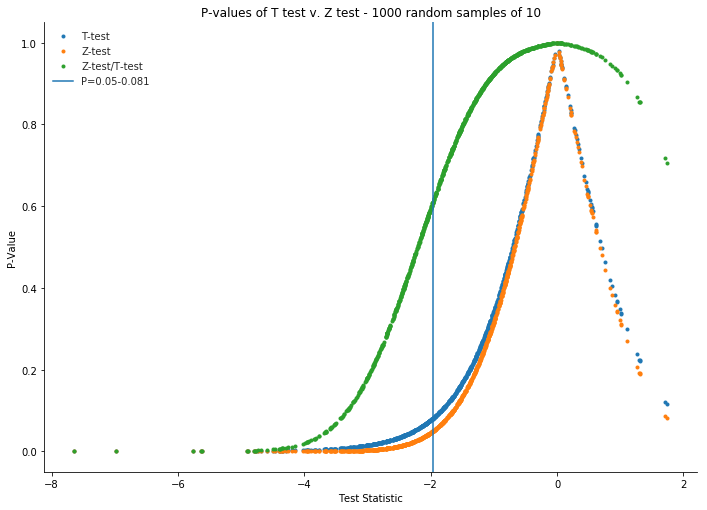

In [13]:
#Plot 1000 random samples of 10, and outcome of Z based v. T based tests.
#Initialize DataFrame
testdf = pd.DataFrame(columns = ['draw10','tenT','T-test','Z-test'])
np.random.seed(42)
for i in range(1000):    
    testdf.loc[i] = smallTvZ(T)

#Sort and split df
testdf = testdf.sort_values(by=['tenT'])
tenTlist = testdf['tenT']
tenTPlist = testdf['T-test']
tenZPlist = testdf['Z-test']

#Plot outcome of tests as well as the proportional difference between them.
f1, ax1 = plt.subplots(1, 1)
plt.plot(tenTlist,tenTPlist,linestyle='none', marker='.')
plt.plot(tenTlist,tenZPlist,linestyle='none', marker='.')
plt.plot(tenTlist,tenZPlist/tenTPlist, linestyle='none', marker='.', label='Z-test/T-test')

#Draw line at test statiztic need for a Z test P-value of 0.05
lineloc = testdf.loc[testdf['Z-test'] < 0.05].index[-1]
plt.axvline(testdf['tenT'][lineloc], label='P='+str(round(tenZPlist[lineloc],3))+'-'+str(round(tenTPlist[lineloc],3)))

#Adjust, label, and show plot
f1.set_size_inches(A4)
sns.despine()
sns.set_style('darkgrid')
ax1.set_xlabel('Test Statistic')
ax1.set_ylabel('P-Value')
ax1.set_title('P-values of T test v. Z test - 1000 random samples of 10')
plt.legend()
plt.show()


A plot of the the two tailed P-values based on the T test v. The Z test for $H_0: \mu = 98.6 ^{\circ}$ using 1000 random samples of 10, shows that the Z test assumes much higher levels of precision than the T test as the test statistic gets further from 0. Plotting the proportion of the Z based P-value to the T based P-value shows that the Z based value is about 60% of the T-based value when the test statistic is about $\mid2\mid$ from 0. The Z test yields a P-value of ~0.05 at that level, whereas the T test yields a value of ~.081, meaning the tests would have a quite different results at commonly used $\alpha$ levels. As the test statistic becomes more extreme, so does the difference in proportion between the two test outcomes. In fact, the P-values generated from the Z test seem to quickly approach 0% of those generated by the T test past test statistics of $\mid4\mid$.

This indicates the T test is much more appropriate for tests in which lower precision is expected such as with a small sample size

### 5. At what temperature should we consider someone's temperature to be "abnormal"?


#### Bootstrap Margin of Error / Confidence interval
Margin for error is 1/2 confidence interval? 95% confidence interval is one margin for error above and one below $
SE\hat{p}$ ? < correct grammar later

In [18]:
#Bootstrap confidence interval from the sample. 

np.random.seed(42) #seed random for consistant output

#create n(10000) bootstrap sample means
bs_means = bs_sample(T, np.mean, n)
#Find the 95% confidence interval
bs_interval = np.percentile(bs_means, [2.5,97.5])
#print the results
print('95% confidence interval:', str(round(bs_interval[0],2))+',', round(bs_interval[1],2))

95% confidence interval: 98.12, 98.37


After randomly re-sampling our dataset (with replacement) 10,000 times, 95% of the sample means fall within 98.12 and 98.37 degrees F (rounded to the nearest hundredth). We can therefore say with 95% confidence that the true mean of the population is between those temperatures. However, this might not 

For a different approach, we can calculate the 95% interval on the bootstrap samples themselves 10,000 times and average their results. 

In [72]:
#Bootstrap confidence, approach: 2

#randomize the seed as we aren't plotting and don't need to generate constent images.
np.random.seed(None)

#intialize dataframe
bs_intervals = pd.DataFrame(index=['int1','int2'])

#generate bootstrap confidence intervals
for i in range(10000):
    bs_intervals[i] = np.percentile(np.random.choice(T, size=len(T)), ([2.5,97.5]))

#average the results
int1 = np.mean(bs_intervals.loc['int1'])
int2 = np.mean(bs_intervals.loc['int2'])

#Print the results
print('Mean 95% confidence interval - 10,000 bootstrap samples:',round(int1, 2), round(int2, 2))

#Show the dataframe of confidence intervals
bs_intervals

Mean 95% confidence interval - 10,000 bootstrap samples: 96.77 99.58


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
int1,96.7000,96.845,96.7,97.0,96.7225,96.7000,96.7000,96.7,96.7225,96.7,...,97.0225,96.4000,96.700,96.7000,96.39,96.8225,96.7675,96.7,96.4675,96.700
int2,99.7875,100.000,99.4,100.0,99.3775,99.8875,99.7875,99.4,99.8650,99.4,...,99.4775,99.4775,100.485,99.3775,99.81,99.3000,99.5000,99.9,99.4775,99.455


This process consistently produces a 95% confidence interval of 96.77, 99.58 Degrees F when rounded to two decimal places. We could say that temperatures outside this range are in the outer 5% of the temperature range and therefore "abnormal"